In [1]:
import os

import torch
import wandb
from hydra import compose, initialize
from torch.utils.data import DataLoader

from src.utils.load import load_dvinp
from src.utils.visualize import visualize_dvinp_both

In [2]:
try:
    import torch_directml
    device = torch_directml.device() 
except ImportError:
    device = torch.device("cpu") 

In [3]:
dir = "../models/test_cmcd" 

In [4]:
with initialize(version_base=None, config_path=dir):
    cfg = compose(config_name="cfg")

    dvinp, trainer = load_dvinp(cfg, device)

    dvinp_path = f"{dir}/dvinp.pth"
    optim_path = f"{dir}/optim.pth"

    if os.path.exists(dvinp_path):
        dvinp_state_dict = torch.load(dvinp_path, map_location=torch.device("cpu"))
        dvinp.load_state_dict(dvinp_state_dict)
        print(f"loaded dvinp from {dvinp_path}")

    if os.path.exists(optim_path):
        optim_state_dict = torch.load(optim_path, map_location=torch.device('cpu'))
        trainer.optimizer.load_state_dict(optim_state_dict)
        print(f"loaded optim from {optim_path}")

Generating tasks: 100%|██████████| 4096/4096 [00:00<00:00, 297873.76it/s]
Dropped Escape call with ulEscapeCode : 0x03007703


In [5]:
wandb_logging = False

trainer.wandb_logging = wandb_logging

if wandb_logging:
    wandb.init(project="test-new")

In [6]:
# trainer.optimizer.param_groups[0]["lr"] = 0.2 * cfg.training.learning_rate
# print(trainer.optimizer.param_groups[0]["lr"])

In [8]:
num_epochs = 100

losses = trainer.train(
    num_epochs=num_epochs,
    max_clip_norm=cfg.training.max_clip_norm,
    alpha=cfg.training.alpha,
    validate=True
)

  0%|          | 0/1 [00:00<?, ?it/s]/home/chickencurry/miniconda3/envs/directml/lib/python3.11/site-packages/torch/distributions/normal.py:71: UserWarning: The operator 'aten::normal.Tensor_Tensor' is not currently supported on the DML backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /__w/1/s/pytorch-directml-plugin/torch_directml/csrc/dml/dml_cpu_fallback.cpp:15.)
  return torch.normal(self.loc.expand(shape), self.scale.expand(shape))
/home/chickencurry/dvi-for-bml/src/utils/grid.py:75: RuntimeWarning: invalid value encountered in divide
  vals = vals / np.sum(vals, axis=-1, keepdims=True)
 31%|███▏      | 10/32 [00:18<00:39,  1.81s/it, epoch=3, loss=2.52e+4, lmpl=-162, mse=478]


ValueError: Expected parameter loc (Tensor of shape (128, 4, 64, 1)) of distribution Normal(loc: torch.Size([128, 4, 64, 1]), scale: torch.Size([128, 4, 64, 1])) to satisfy the constraint Real(), but found invalid values:
tensor([[[[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]],

         [[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]],

         [[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]],

         [[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]]],


        [[[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]],

         [[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]],

         [[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]],

         [[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]]],


        [[[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]],

         [[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]],

         [[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]],

         [[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]]],


        ...,


        [[[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]],

         [[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]],

         [[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]],

         [[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]]],


        [[[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]],

         [[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]],

         [[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]],

         [[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]]],


        [[[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]],

         [[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]],

         [[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]],

         [[nan],
          [nan],
          [nan],
          ...,
          [nan],
          [nan],
          [nan]]]], device='privateuseone:0', grad_fn=<ViewBackward0>)

/home/chickencurry/miniconda3/envs/directml/lib/python3.11/site-packages/torch/distributions/normal.py:71: UserWarning: The operator 'aten::normal.Tensor_Tensor' is not currently supported on the DML backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /__w/1/s/pytorch-directml-plugin/torch_directml/csrc/dml/dml_cpu_fallback.cpp:15.)
  return torch.normal(self.loc.expand(shape), self.scale.expand(shape))


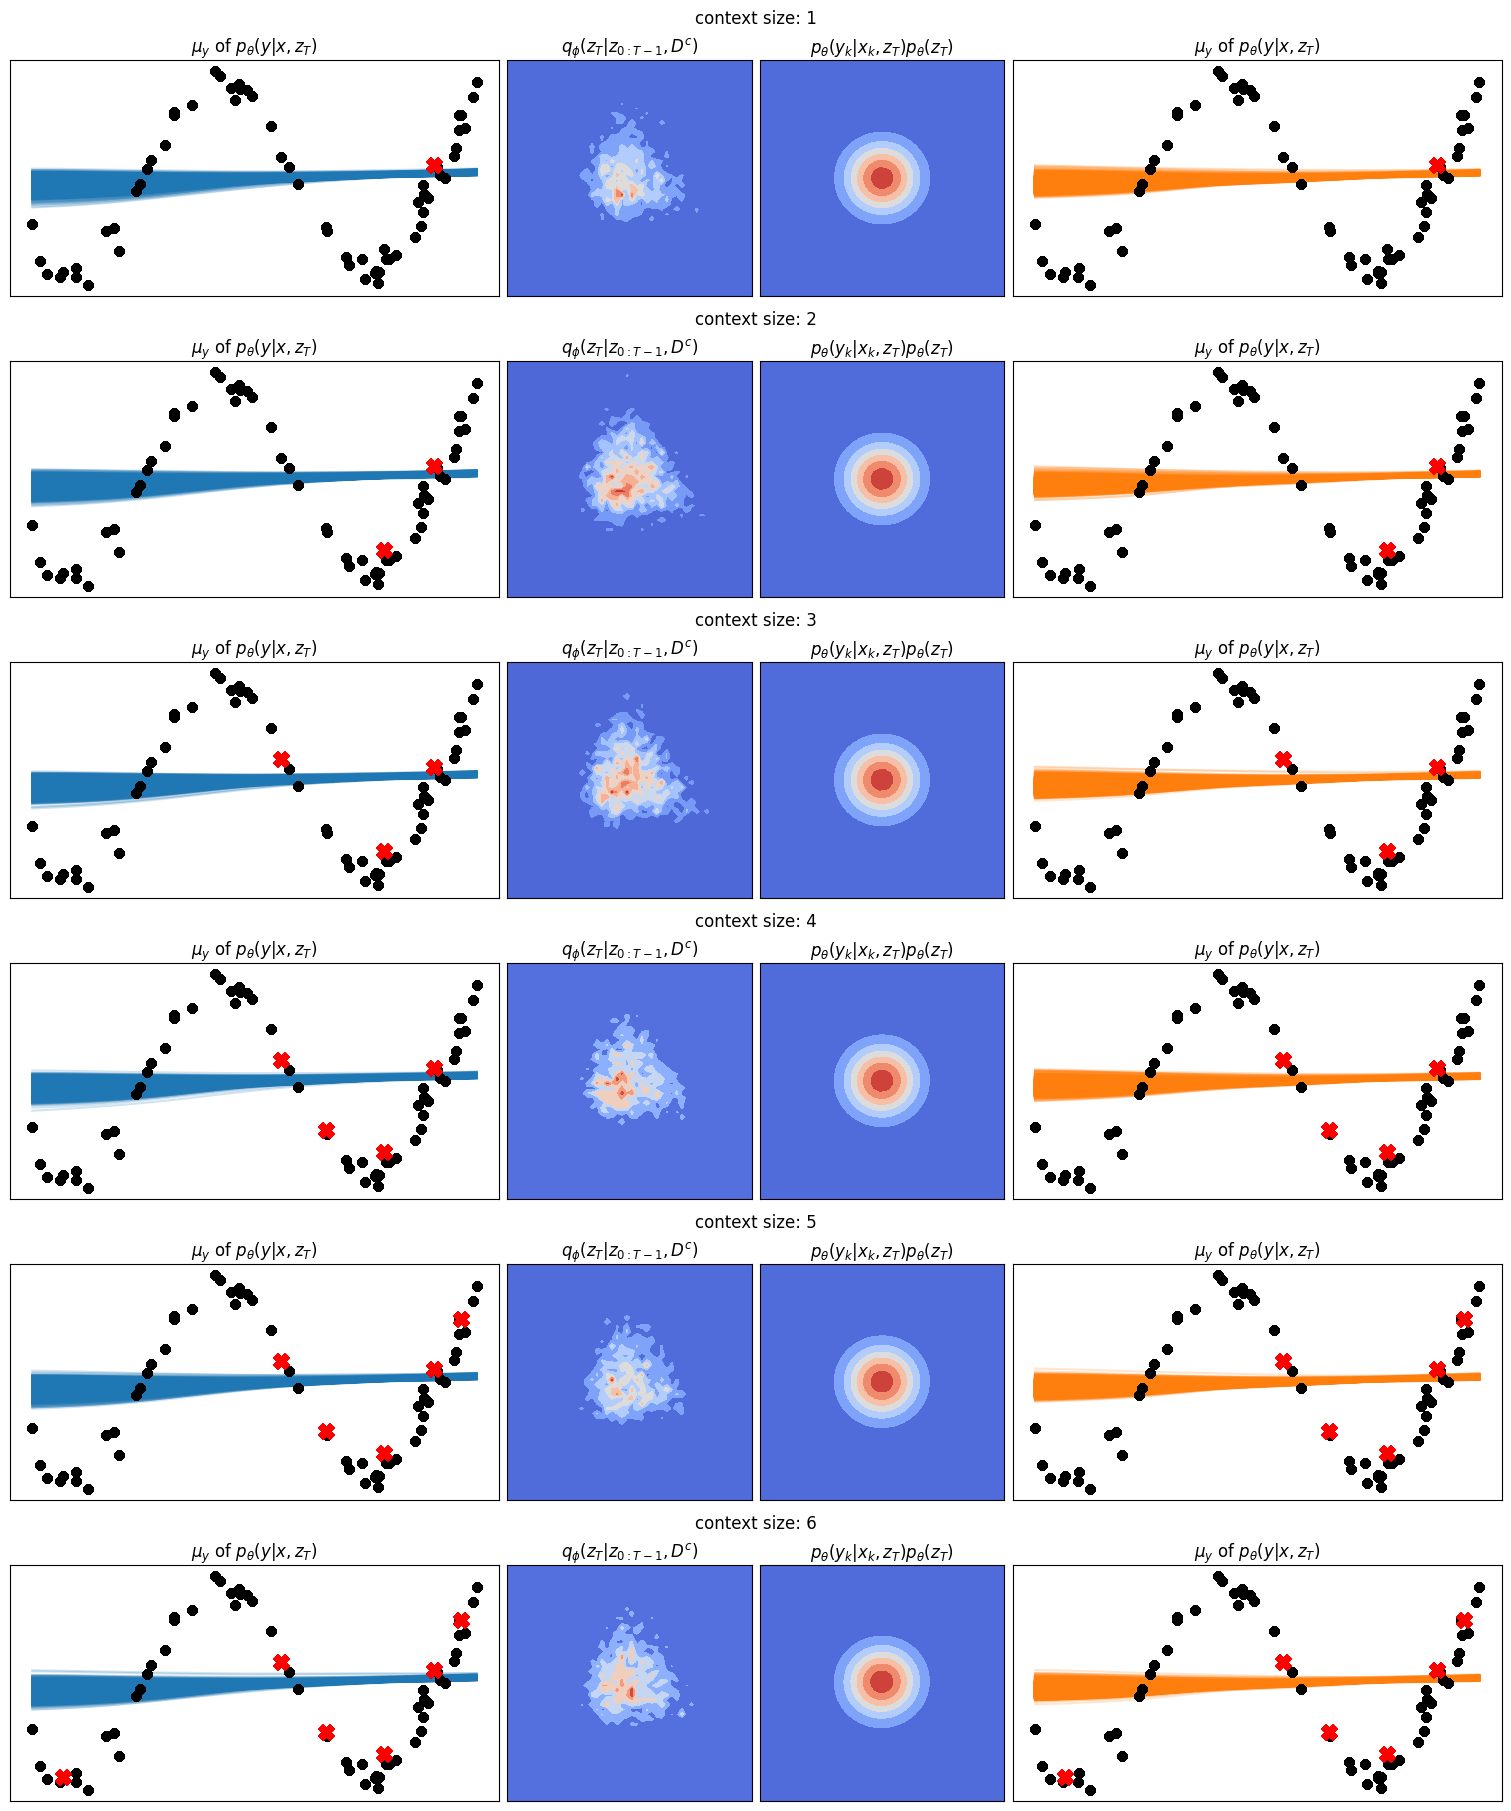

In [7]:
max_context_size = 6
num_samples = 2500 # num_cells will be root
gen_dataloader = DataLoader(trainer.dataset, 1, True)

ranges = [(-5, 5), (-5, 5)]

targets, samples = visualize_dvinp_both(
    device=device,
    dvinp=dvinp,
    dataloader=gen_dataloader,
    num_samples=num_samples,
    max_context_size=max_context_size,
    ranges=ranges,
)

In [21]:
torch.save(dvinp.state_dict(), f"{dir}/dvinp.pth")